# Polinomial Regression:
* Verideki iliski dogrusal degilse, Lineer Regression yetersiz kalabilir. Bu gibi durumlarda polinom regresyon kullanlir.
* 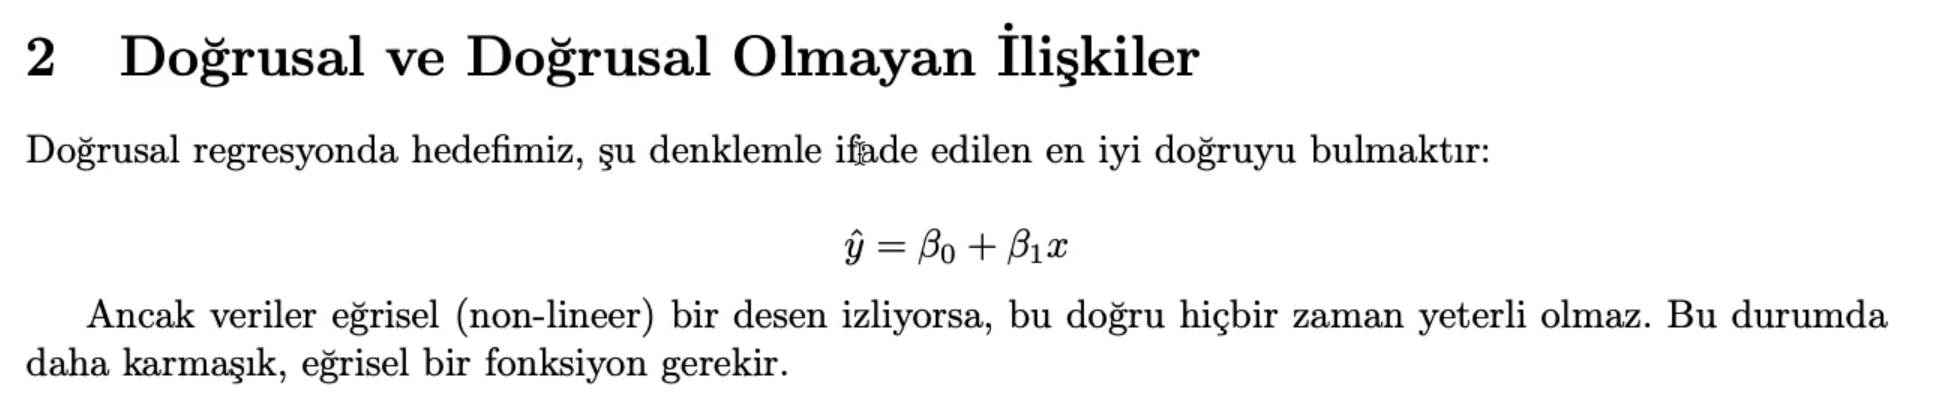
* Dogrusal regresyonda hedefimiz, su denklemle ifade edilen en iyi dogruyu bulmaktir:
    * ý = Bo + B1x
    * Ancak veriler egrisel (non-lineer) bir desen izliyorsa, bu dogru higbir zaman yeterli olmaz. Bu durumda daha karmasik, egrisel bir fonksiyon gerekir.

* Polinom regresyon, girdiyi (bagimsiz degiskeni) daha yüksek dereceli terimlerle modelleyerek daha esnek tahminler yapilmasini saglar. Örneğin
    * y = Bo + BIx + B2x?+... + Впх"
    * Buradaki n, polinomun derecesini belirtir. Derece arttikça model daha esnek hale gelir ancak agiri ögrenme (overfitting) riski artar.
        * Peki overfitting risk neden artar?:
            * Çünkü mesela derece 1 iken bu lineer fonksiyon olur, 2 iken bir curve'e sahip olur 15 curve'e sahip olursa 14 tane curve olan yılan gibi bir model olur. Yani aslında bu modeli öğrenmekten çıkar ezberlemeye başlar. This means it can “memorize” the data instead of “learning” the true pattern.

In [144]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline # iki tane modeli arka arkaya çalıştırmak için bir yöntem. Kullanmasak da oluyor bu arada.

In [146]:
df = pd.read_csv('3-customersatisfaction.csv')

In [148]:
df.describe()

# 'Incentive' kısmı müşteri hizmetlerinin primi gibi düşün yani konuşan kişilere göre prim veriyoruz

,Unnamed: 0,Customer Satisfaction,Incentive
count,100.000000,100.000000,100.000000
mean,49.500000,-0.005427,3.445220
std,29.011492,1.721792,2.911818
min,0.000000,-2.992863,-1.068081
25%,24.750000,-1.431357,1.471341
50%,49.500000,0.109167,2.748839
75%,74.250000,1.421119,4.739113
max,99.000000,2.986736,11.000056


In [150]:
df.drop("Unnamed: 0", axis=1, inplace=True)

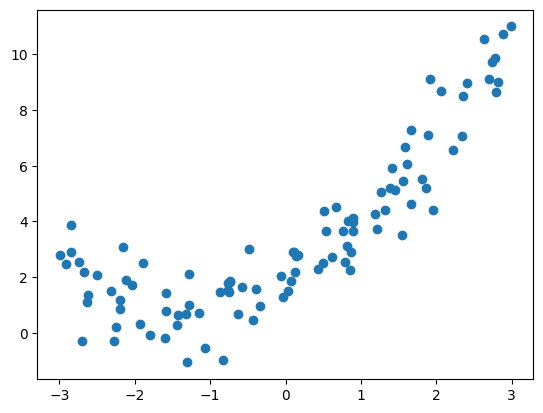

In [152]:
plt.scatter(df["Customer Satisfaction"], df["Incentive"])

In [154]:
# Dependent & Independent:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [156]:
# Split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [160]:
# Regression
regression = LinearRegression()
# Scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)